In [28]:
import os
from dotenv import load_dotenv, find_dotenv

load_dotenv(find_dotenv())
%load_ext rich

The rich extension is already loaded. To reload it, use:
  %reload_ext rich


In [89]:
import base64
import io
from langchain_openai import ChatOpenAI
from PIL import Image
from textwrap import dedent
from pydantic import BaseModel, Field
from langchain_core.messages import HumanMessage, SystemMessage

In [71]:
def convert_image_to_base64(image):
    # Convert PIL Image to bytes
    img_byte_arr = io.BytesIO()
    image.save(img_byte_arr, format=image.format)
    img_bytes = img_byte_arr.getvalue()

    return base64.b64encode(img_bytes).decode("utf-8")


In [ ]:
class Nicknames(BaseModel):
    nicknames: list[str] = Field(
        description="A list of words that reflect possible nicknames for the sprite",
    )

In [114]:
def get_nicknames(pokemon_name):
    # Encode bytes to base64
    pokemon_image = Image.open(f"sprites/{pokemon_name}_combined.png")
    pokemon_image_b64 = convert_image_to_base64(pokemon_image)

    display(pokemon_image)

    model = ChatOpenAI(model="gpt-4o", temperature=0.7)

    messages = [
        SystemMessage(
            dedent("""
    Please provide a list of 5 words from the English dictionary for this sprite that reflect possible nicknames. Each word should be a single word and be appropriate for a nickname.
    """)
        ),
        HumanMessage(
            [
                {
                    "type": "image_url",
                    "image_url": {"url": f"data:image/jpeg;base64,{pokemon_image_b64}"},
                }
            ]
        ),
    ]

    answer = model.with_structured_output(Nicknames).invoke(messages)

    return answer

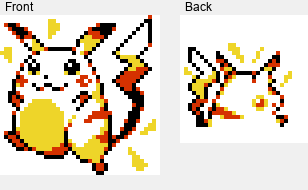

Nicknames(nicknames=['Sparky', 'Zappy', 'Bolt', 'Flicker', 'Buzz'])

In [115]:
get_nicknames('pikachu')